# Ethnicity & Race & Gender

*Ethnicity* is Hispanic (1) or Non-Hispanic (2)

*Race* is White (1), Black (2), Asian (3), American Indian/Alaskan Native (4), Pacific Islander (5), Other (90)

*Gender* is Male (1), Female (2)


In [1]:
import seaborn as sns

# call the 02-data-cleaning.ipynb notebook to bring the pecarn_tbi dataframe and the cleaned dataframe into the environment
%cd -q ../notebooks
%run ./02-data-cleaning.ipynb
%cd -q -

START: 00-load-raw-data.ipynb
  PECARN TBI data read from c:\Jan\Capstone\notebooks/TBI PUD 10-08-2013.csv into "pecarn_tbi" dataframe
START: 01-data-labelling.ipynb
START: 02-data-cleaning.ipynb
  Dropping 3 rows where Gender is NaN
  Setting 15964 rows where Ethnicity is NaN to Non-Hispanic
  Setting 2029 rows where Race is NaN and Ethnicity is Hispanic to White
  Dropping records where GCS < 14
  Dropping GCS columns as they are now redundant
  Dropping AgeInMonth
  Renaming AgeinYears to Age
  Dropping EmplType
  Dropping AgeInMonth
  Dropping High_impact_InjSev
  Renaming InjuryMech to Injury_Mechanism
  Renaming ActNorm to Acting_Normal
  Setting Acting_Normal missing data to 1 (Yes)
  Dropping Ind## columns
  Dropping Findings## columns
  Dropping CT columns
  Dropping EDCT column
  Dropping PosCT column
  Dropping EDDisposition column
  Dropping Observed column
  Dropping DeathTBI, Neurosurgery, Intub24Head, HospHeadPosCT variables
  The cleaned dataset is now available in a da

## Check for missing data (NaNs)

In [2]:
# total NaNs in original TBI data
pecarn_tbi[['Race', 'Ethnicity', 'Gender']].isna().sum()

Race          3208
Ethnicity    15966
Gender           3
dtype: int64

In [3]:
# percentage of missing data in race, ethnicity, and gender
pecarn_tbi[['Race', 'Ethnicity', 'Gender']].isna().sum() / pecarn_tbi[['Race', 'Ethnicity', 'Gender']].shape[0] * 100

Race          7.391875
Ethnicity    36.788866
Gender        0.006913
dtype: float64

In [4]:
# total of NaNs in dataset after data cleaning is applied
data[['Race', 'Ethnicity', 'Gender']].isna().sum()

Race         1092
Ethnicity       0
Gender          0
dtype: int64

In [5]:
# create a working dataset
demo = data[['Gender', 'Race', 'Ethnicity', 'PosIntFinal']]

## Gender
There are only 3 records that have a NaN *Gender*. As this is a very small number of rows, it is appropriate to remove these from the dataset.

In [6]:
pecarn_tbi[pecarn_tbi['Gender'].isna()]

,AMS,AMSAgitated,AMSOth,AMSRepeat,AMSSleep,AMSSlow,ActNorm,AgeInMonth,AgeTwoPlus,AgeinYears,...,SFxPalp,SFxPalpDepress,Sedated,Seiz,SeizLen,SeizOccur,Vomit,VomitLast,VomitNbr,VomitStart
PatNum,,,,,,,,,,,,,,,,,,,,,
7822,0,92,92,92,92,92,Yes,69,2,5,...,0,92,0,0,92,92,1,2,3,3
30294,0,92,92,92,92,92,Yes,196,2,16,...,0,92,0,0,92,92,0,92,92,92
39699,0,92,92,92,92,92,NaN,190,2,15,...,0,92,0,0,92,92,0,92,92,92


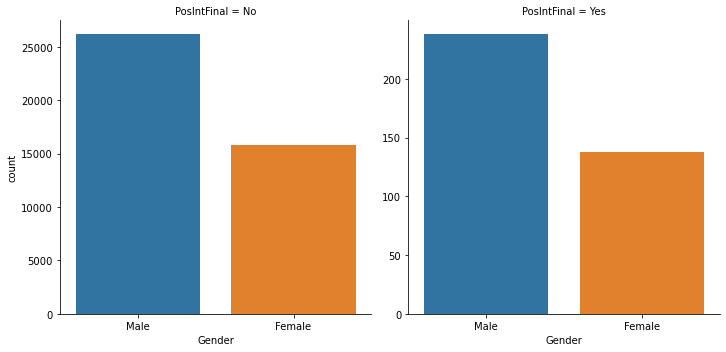

In [7]:
sns.catplot(kind='count', x='Gender', col='PosIntFinal', sharey=False, data=demo)

## Ethnicity
There are a very large number of records missing for Ethnicity. We have essentially two choices:
- drop the column
- set the column to "2" Non-Hispanic as it is most frequent
- set the column to "2" Non-Hispanic on the basis it would have been set as "1" Hispanic if it was relevant information

In [8]:
pecarn_tbi[~pecarn_tbi['Ethnicity'].isna()]['Ethnicity'].value_counts()

Non-Hispanic    22158
Hispanic         5275
Name: Ethnicity, dtype: int64

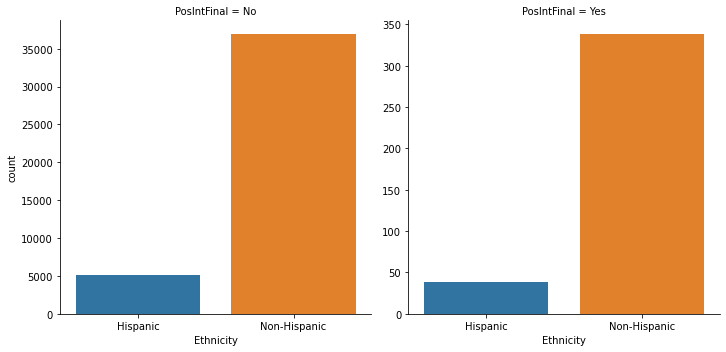

In [9]:
sns.catplot(kind='count', x='Ethnicity', col='PosIntFinal', sharey=False, data=demo)

## Race

The distributions of *Race* look similar between the *PosIntFinal* class.

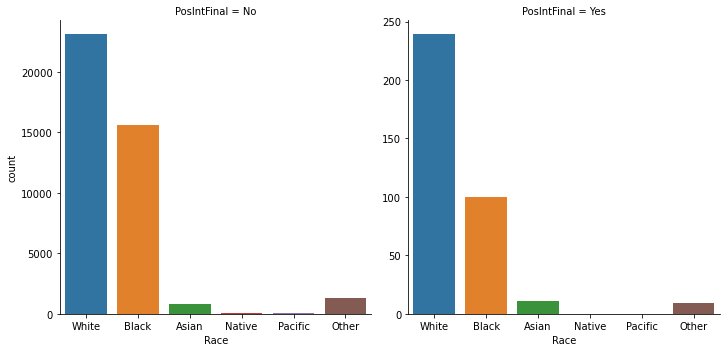

In [10]:
sns.catplot(kind='count', x='Race', col='PosIntFinal', sharey=False, data=demo)

In [11]:
(pecarn_tbi['Ethnicity'].eq('Hispanic') & pecarn_tbi['Race'].isna()).sum()

2029

It appears as though the majority of people who have their Ethnicity as Hispanic, also have no 'Race' set.

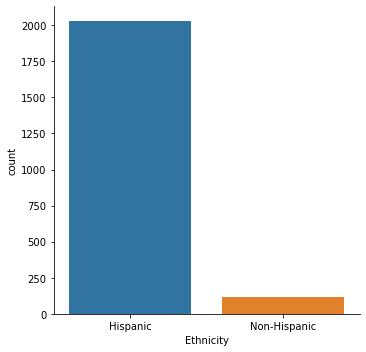

In [12]:
sns.catplot(kind='count', x='Ethnicity', sharey=False, data=pecarn_tbi[pecarn_tbi['Race'].isna()])

And, the majority of people who are identified as Hispanic, are identified as White. 

Thus, using a most-frequent imputation (later) is acceptable.

However, we can do this ahead of time just to make it explicit.

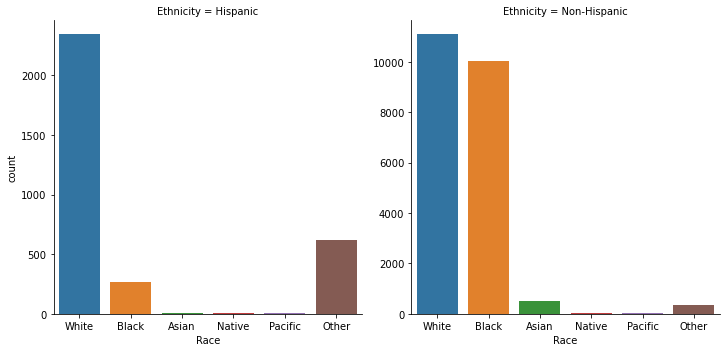

In [13]:
sns.catplot(kind='count', x='Race', col='Ethnicity', sharey=False, data=pecarn_tbi)

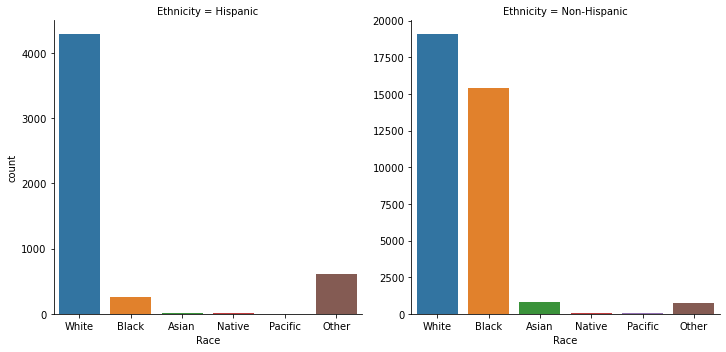

In [14]:
sns.catplot(kind='count', x='Race', col='Ethnicity', sharey=False, data=data)